# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [248]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from kmodes.kprototypes import KPrototypes
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

## **Memuat Dataset dan Menampilkan Baris Awal Data**

In [249]:
df = pd.read_csv('Dataset_inisiasi.csv')
df.head()

,item_id,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
0,91c0e569-bddd-4128-9720-2550bb85580e,64800000.0,0,263682f6-d0cd-4569-aeec-e727b76b7665,1.0,42,False,3.0,0.0,True,23.0
1,b00b7919-06be-4d26-98b8-1971787e1d46,72000000.0,4320000,97c9535e-3985-47ce-a84c-a962c838a76b,2.0,116,True,NaN,1.0,True,16.0
2,9eddb6bc-e424-4774-b55f-bfd54366d627,50400000.0,1440000,b790f536-c274-4147-86e0-94d9b6d7352d,1.0,74,False,2.0,0.0,True,19.0
3,12cf6b07-5d56-4126-94d2-ce9cbfe2214f,36000000.0,864000,93d06676-4975-4cc5-919b-3a0c29c7ad43,1.0,60,True,NaN,2.0,False,6.0
4,929eb20c-3694-46b2-b96c-91117b995d1b,28800000.0,1296000,58e59fa9-9947-478f-9cef-bc6a2cbe49a9,1.0,45,True,NaN,1.0,True,4.0


## **Menghapus Kolom yang mengandung ID**

In [250]:
dataku = df.drop(columns=['item_id', 'district_uuid'])
dataku.head()

,deposit,monthly_rent,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
0,64800000.0,0,1.0,42,False,3.0,0.0,True,23.0
1,72000000.0,4320000,2.0,116,True,NaN,1.0,True,16.0
2,50400000.0,1440000,1.0,74,False,2.0,0.0,True,19.0
3,36000000.0,864000,1.0,60,True,NaN,2.0,False,6.0
4,28800000.0,1296000,1.0,45,True,NaN,1.0,True,4.0


## **Menampilkan Informasi Umum Dataset**

In [251]:
dataku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   deposit               4925 non-null   float64
 1   monthly_rent          4930 non-null   int64  
 2   room_qty              4927 non-null   float64
 3   unit_area             4930 non-null   int64  
 4   has_elevator          4913 non-null   object 
 5   building_floor_count  3282 non-null   float64
 6   unit_floor            4893 non-null   float64
 7   has_storage_area      4920 non-null   object 
 8   property_age          4926 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 346.8+ KB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## **1. Memahami Struktur Data**

### Meninjau jumlah baris dan kolom dalam Dataset

In [252]:
print(f"Jumlah baris dan kolom: {dataku.shape}")

Jumlah baris dan kolom: (4930, 9)


### Meninjau jenis data di setiap kolom dalam Dataset

In [253]:
print("\nJenis data di setiap kolom:")
print(dataku.dtypes)


Jenis data di setiap kolom:
deposit                 float64
monthly_rent              int64
room_qty                float64
unit_area                 int64
has_elevator             object
building_floor_count    float64
unit_floor              float64
has_storage_area         object
property_age            float64
dtype: object


Dari informasi tersebut, diketahui bahwa kolom deposit, monthly_rent, room_qty, unit_area, building_floor_count, dan property_age adalah kolom dengan jenis data numerikal. Sedangkan kolom has_elevator dan has_storage_area adalah kolom dengan jenis data kategorikal.

## **2. Menangani Data yang Hilang**

### Melakukan identifikasi dan analisis data yang hilang

In [254]:
missing_data = dataku.isnull().sum()
print(missing_data)

deposit                    5
monthly_rent               0
room_qty                   3
unit_area                  0
has_elevator              17
building_floor_count    1648
unit_floor                37
has_storage_area          10
property_age               4
dtype: int64


Pada hasil identifikasi data yang hilang, terlihat bahwa kolom building_floor_count memiliki jumlah missing value yang banyak. Karena jenis data kolom ini juga adalah numerikal, jadi saya akan menggunakan metode Median Imputation untuk menangani missing value ini. Lalu, untuk kolom yang lainnya karena missing valuenya sedikit, saya akan menggunakan metode Dropping saja.

## **3. Analisis Distribusi dan Korelasi**

### Menampilkan Statistik Deskriptif untuk Variabel Numerik

In [255]:
print("Statistik Deskriptif untuk Variabel Numerik:")
dataku.describe()

Statistik Deskriptif untuk Variabel Numerik:


,deposit,monthly_rent,room_qty,unit_area,building_floor_count,unit_floor,property_age
count,4.925000e+03,4.930000e+03,4927.000000,4930.000000,3282.000000,4893.000000,4926.000000
mean,8.321284e+07,1.052041e+06,1.471890,71.653347,3.970750,2.417127,13.651035
std,5.289941e+07,3.797125e+06,0.579431,22.890889,1.280667,3.496221,8.483931
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-2.000000,0.000000
25%,4.320000e+07,0.000000e+00,1.000000,55.000000,3.000000,1.000000,8.000000
50%,7.200000e+07,7.200000e+05,1.000000,67.000000,4.000000,2.000000,14.000000
75%,1.080000e+08,1.440000e+06,2.000000,84.000000,4.000000,3.000000,18.000000
max,4.320000e+08,1.440000e+08,5.000000,263.000000,16.000000,225.000000,99.000000


### Menampilkan Visualisasi Histogram untuk Distribusi Variabel Numerik

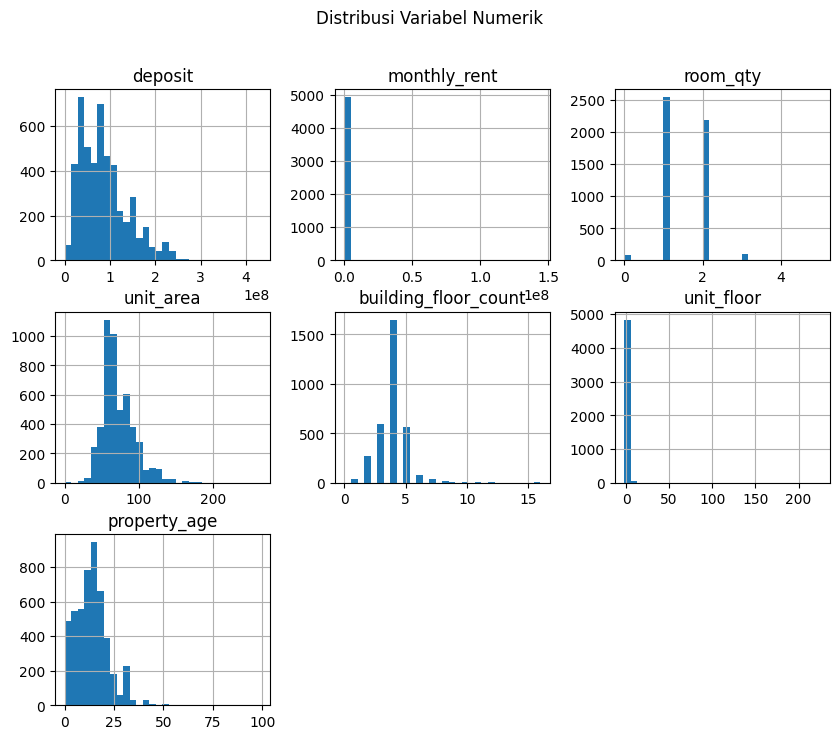

In [256]:
dataku.hist(bins=30, figsize=(10, 8))
plt.suptitle('Distribusi Variabel Numerik')
plt.show()

### Menampilkan Hubungan antar variabel dengan matriks korelasi

In [257]:
correlation_matrix = dataku.corr()

print("Korelasi antar variabel:")
print(correlation_matrix)

Korelasi antar variabel:
                       deposit  monthly_rent  room_qty  unit_area  \
deposit               1.000000     -0.150481  0.428942   0.492766   
monthly_rent         -0.150481      1.000000  0.054552   0.067287   
room_qty              0.428942      0.054552  1.000000   0.699367   
unit_area             0.492766      0.067287  0.699367   1.000000   
has_elevator          0.280054      0.022148  0.102382   0.113060   
building_floor_count  0.245271      0.037372  0.133984   0.074823   
unit_floor            0.065723      0.004450  0.056855   0.015948   
has_storage_area      0.171614      0.024662  0.089525   0.067260   
property_age         -0.160090      0.011785  0.007366   0.066211   

                      has_elevator  building_floor_count  unit_floor  \
deposit                   0.280054              0.245271    0.065723   
monthly_rent              0.022148              0.037372    0.004450   
room_qty                  0.102382              0.133984    0.056855

## **4. Visualisasi Data**

### Menampilkan visualisasi data untuk variabel kategorikal

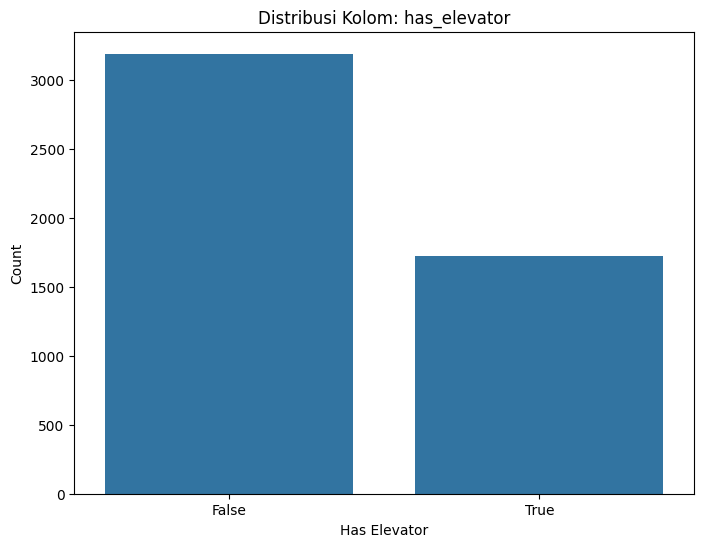

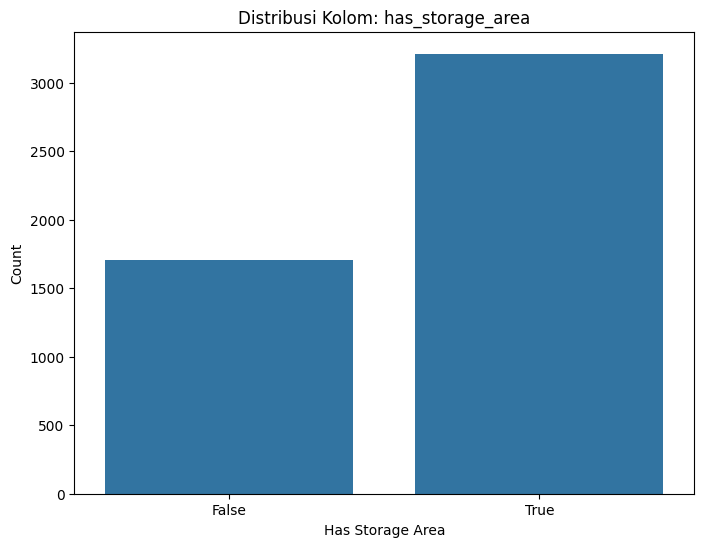

In [258]:
plt.figure(figsize=(8, 6))
sns.countplot(x='has_elevator', data=dataku)
plt.title('Distribusi Kolom: has_elevator')
plt.xlabel('Has Elevator')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='has_storage_area', data=dataku)
plt.title('Distribusi Kolom: has_storage_area')
plt.xlabel('Has Storage Area')
plt.ylabel('Count')
plt.show()

### Menampilkan visualisasi hasil matriks korelasi dengan heatmap

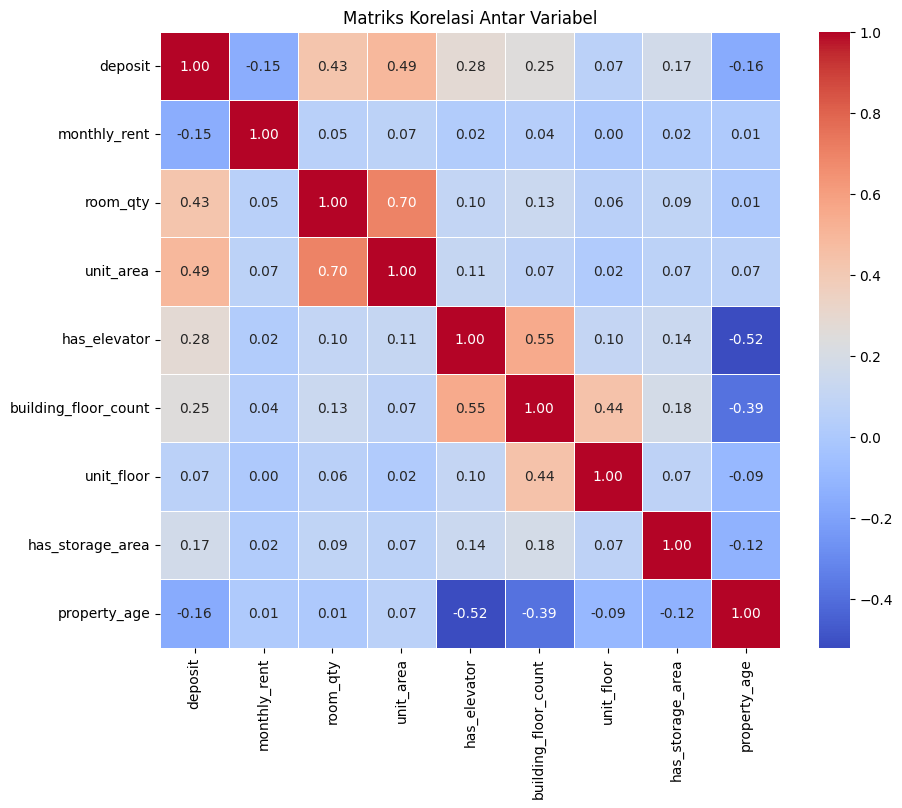

In [259]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi Antar Variabel')
plt.show()

Dari hasil visualisasi Matriks Korelasi dengan heatmap ini, dapat dianalisis bahwa:
- unit_area adalah fitur yang sangat penting dalam dataset ini karena memiliki korelasi yang cukup kuat dengan banyak variabel lain, termasuk deposit, room_qty, dan has_elevator.
- property_age menunjukkan hubungan negatif dengan berbagai fitur seperti has_elevator, unit_area, dan building_floor_count, yang bisa menjadi indikasi bahwa properti yang lebih tua memiliki beberapa keterbatasan dibandingkan yang lebih baru.
- Hubungan antara has_elevator dan building_floor_count menunjukkan bahwa properti dengan lebih banyak lantai kemungkinan besar dilengkapi dengan elevator, sementara properti yang lebih kecil atau lebih tua cenderung tidak.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## **Menangani Missing Values**

### Menampilkan Missing Values

In [260]:
print(missing_data)

deposit                    5
monthly_rent               0
room_qty                   3
unit_area                  0
has_elevator              17
building_floor_count    1648
unit_floor                37
has_storage_area          10
property_age               4
dtype: int64


### Menangani Missing Values pada kolom **building_floor_count**

In [261]:
median_building_floor_count = dataku['building_floor_count'].median()

dataku['building_floor_count'].fillna(median_building_floor_count, inplace=True)

print(dataku['building_floor_count'].isnull().sum())

0


### Menangani Missing Values pada kolom **deposit**

In [262]:
dataku.dropna(subset=['deposit'], inplace=True)

### Menangani Missing Values pada kolom **room_qty**

In [263]:
dataku.dropna(subset=['room_qty'], inplace=True)

### Menangani Missing Values pada kolom **has_elevator**

In [264]:
dataku.dropna(subset=['has_elevator'], inplace=True)

### Menangani Missing Values pada kolom **unit_floor**

In [265]:
dataku.dropna(subset=['unit_floor'], inplace=True)

### Menangani Missing Values pada kolom **has_storage_area**

In [266]:
dataku.dropna(subset=['has_storage_area'], inplace=True)

### Menangani Missing Values pada kolom **property_age**

In [267]:
dataku.dropna(subset=['property_age'], inplace=True)

### Mengecek kembali apakah masih ada missing values

In [268]:
dataku.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4872 entries, 0 to 4929
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   deposit               4872 non-null   float64
 1   monthly_rent          4872 non-null   int64  
 2   room_qty              4872 non-null   float64
 3   unit_area             4872 non-null   int64  
 4   has_elevator          4872 non-null   object 
 5   building_floor_count  4872 non-null   float64
 6   unit_floor            4872 non-null   float64
 7   has_storage_area      4872 non-null   object 
 8   property_age          4872 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 380.6+ KB


## **Normalisasi atau Standarisasi Fitur**

### Melakukan Normalisasi untuk Fitur **deposit** dan **monthly_rent** yang datanya memiliki jarak yang jauh

In [269]:
scaler = MinMaxScaler()

dataku[['deposit', 'monthly_rent']] = scaler.fit_transform(dataku[['deposit', 'monthly_rent']])

print(dataku[['deposit', 'monthly_rent']].head())

    deposit  monthly_rent
0  0.150000         0.000
1  0.166667         0.030
2  0.116667         0.010
3  0.083333         0.006
4  0.066667         0.009


## **Deteksi dan Penanganan Outlier**

### Mendeteksi Outlier pada fitur **deposit**

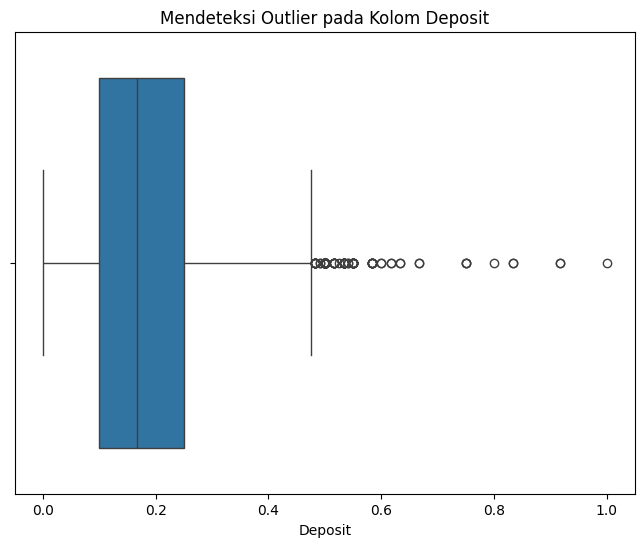

In [270]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=dataku['deposit'])
plt.title('Mendeteksi Outlier pada Kolom Deposit')
plt.xlabel('Deposit')
plt.show()

Penanganan outlier pada fitur deposit tidak perlu dilakukan karena harga deposit nya bisa saja memang sesuai dengan tingkat kemewahan property yang ada

### Mendeteksi Outlier pada fitur **monthly_rent**

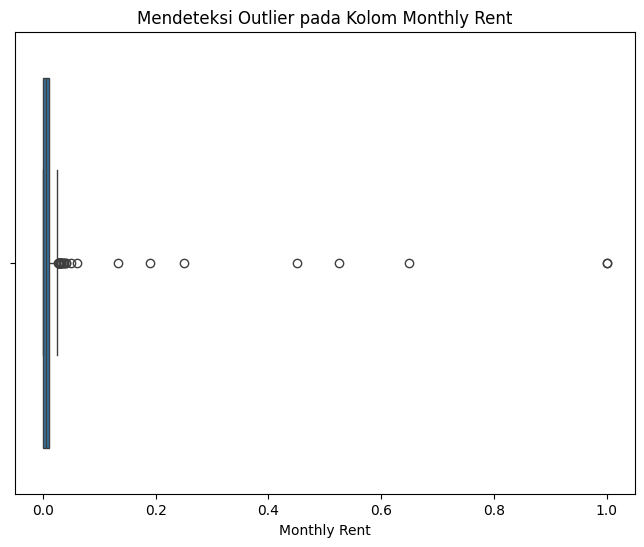

In [271]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=dataku['monthly_rent'])
plt.title('Mendeteksi Outlier pada Kolom Monthly Rent')
plt.xlabel('Monthly Rent')
plt.show()

Penanganan outlier pada fitur monthly_rent tidak perlu dilakukan karena harga sewa bulanannya bisa saja memang sesuai dengan tingkat kemewahan property yang ada

### Mendeteksi Outlier pada fitur **room_qty**

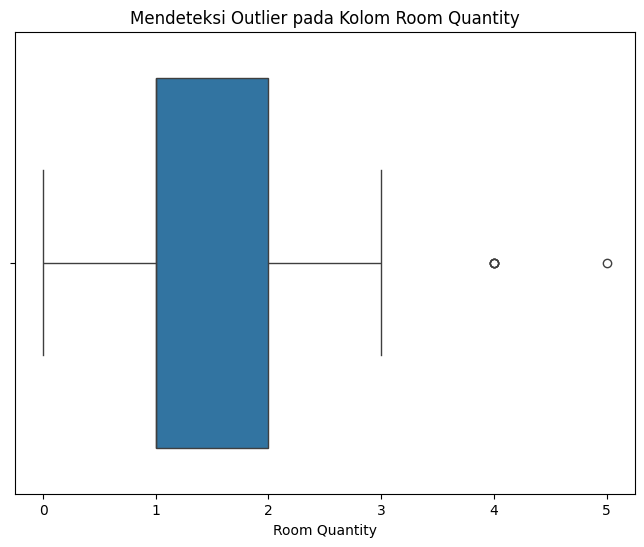

In [272]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=dataku['room_qty'])
plt.title('Mendeteksi Outlier pada Kolom Room Quantity')
plt.xlabel('Room Quantity')
plt.show()

### Mendeteksi Outlier pada fitur **unit_area**

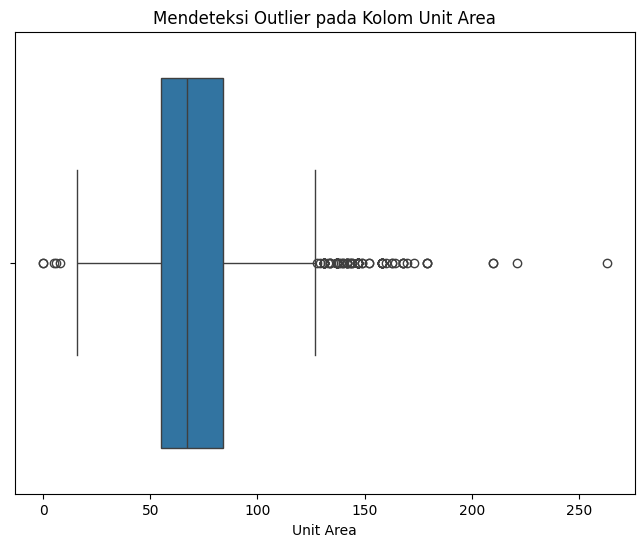

In [273]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=dataku['unit_area'])
plt.title('Mendeteksi Outlier pada Kolom Unit Area')
plt.xlabel('Unit Area')
plt.show()

### Mendeteksi Outlier pada fitur **building_floor_count**

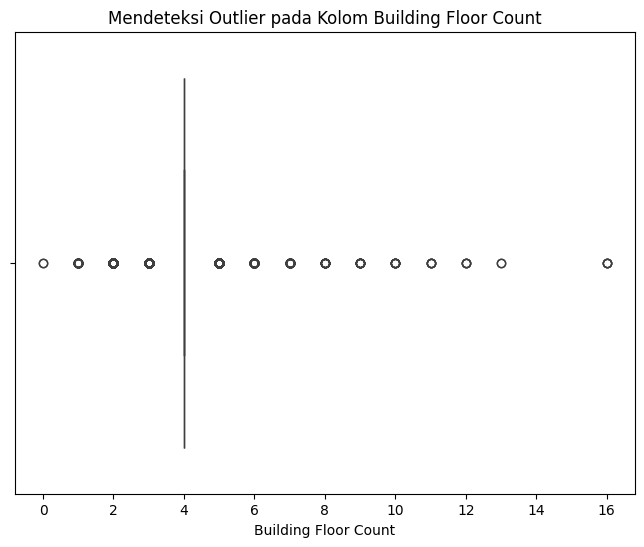

In [274]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=dataku['building_floor_count'])
plt.title('Mendeteksi Outlier pada Kolom Building Floor Count')
plt.xlabel('Building Floor Count')
plt.show()

### Mendeteksi Outlier pada fitur **property_age**

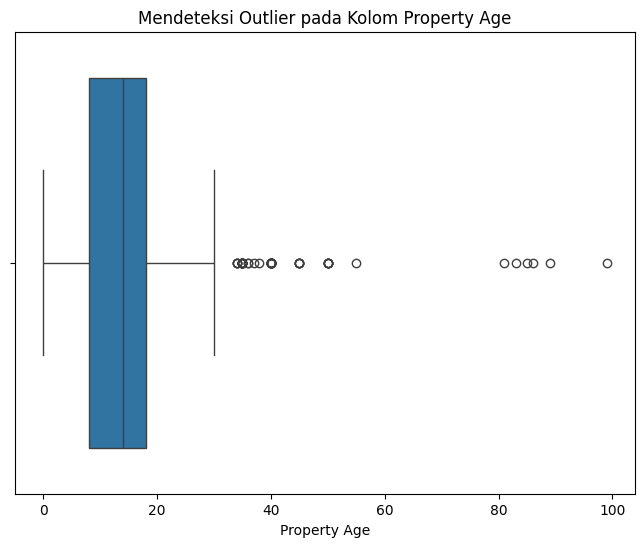

In [275]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=dataku['property_age'])
plt.title('Mendeteksi Outlier pada Kolom Property Age')
plt.xlabel('Property Age')
plt.show()

### **Penanganan Outlier** pada Fitur Numerik

In [276]:
def drop_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

columns_to_check = ['deposit', 'monthly_rent', 'room_qty', 'unit_area', 'building_floor_count', 'property_age']
for column in columns_to_check:
    dataku = drop_outliers(dataku, column)

dataku.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3037 entries, 3 to 4928
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   deposit               3037 non-null   float64
 1   monthly_rent          3037 non-null   float64
 2   room_qty              3037 non-null   float64
 3   unit_area             3037 non-null   int64  
 4   has_elevator          3037 non-null   object 
 5   building_floor_count  3037 non-null   float64
 6   unit_floor            3037 non-null   float64
 7   has_storage_area      3037 non-null   object 
 8   property_age          3037 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 237.3+ KB


Menurut saya outlier pada fitur-fitur numerik pada data ini tidak perlu ditangani karena datanya sejatinya saling berpengaruh dengan fitur deposit dan monthly_rent, jadi jika outlier pada data ditangani otomatis harga deposit dan monthly_rent harus diubah dengan kesesuaian perubahan tersebut. Namun disini saya tetap menangani outliernya dengan metode dropping yang paling sesuai agar tidak perlu ada perubahan.

## **Encoding Data Kategorikal**

### Melakukan encoding pada fitur kategorikal dengan metode **Label Encoding**

In [277]:
label_encoder = LabelEncoder()

dataku['has_elevator'] = label_encoder.fit_transform(dataku['has_elevator'])
dataku['has_storage_area'] = label_encoder.fit_transform(dataku['has_storage_area'])

dataku.head()

,deposit,monthly_rent,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
3,0.083333,0.006,1.0,60,1,4.0,2.0,0,6.0
4,0.066667,0.009,1.0,45,1,4.0,1.0,1,4.0
5,0.283333,0.000,2.0,86,1,4.0,5.0,0,5.0
6,0.143333,0.000,1.0,58,0,4.0,0.0,0,25.0
9,0.200000,0.000,1.0,42,1,4.0,1.0,1,0.0


## **Binning (Pengelompokkan Data)**

### Pengelompokkan Data berdasarkan **Usia Property** nya

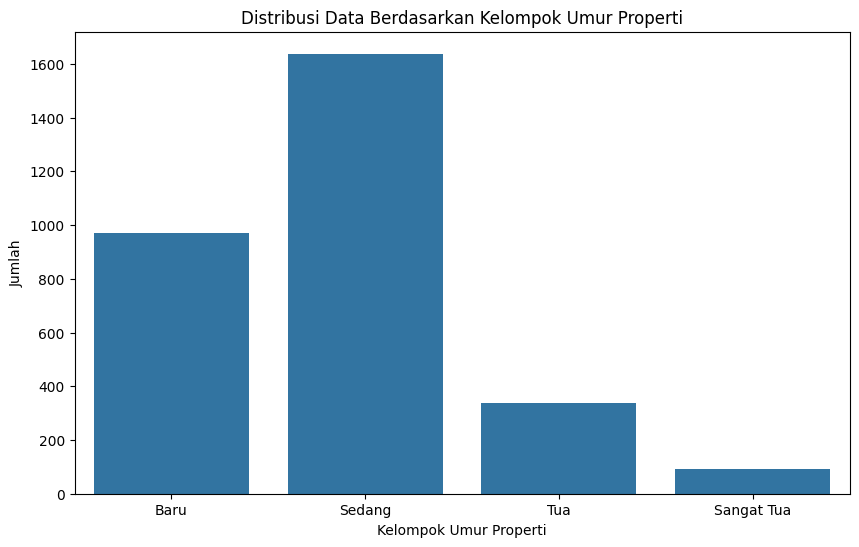

In [278]:
bins = [0, 10, 20, 30, float('inf')]
labels = ['Baru', 'Sedang', 'Tua', 'Sangat Tua']

age_group = pd.cut(dataku['property_age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
sns.countplot(x=age_group, order=labels)
plt.title('Distribusi Data Berdasarkan Kelompok Umur Properti')
plt.xlabel('Kelompok Umur Properti')
plt.ylabel('Jumlah')
plt.show()

Dari visualisasi distribusi data berdasarkan kelompok umur properti, dapat disimpulkan bahwa properti dengan usia 10-20 tahun lebih banyak dari yang lain.

### Pengelompokkan Data berdasarkan **Luas Unit**

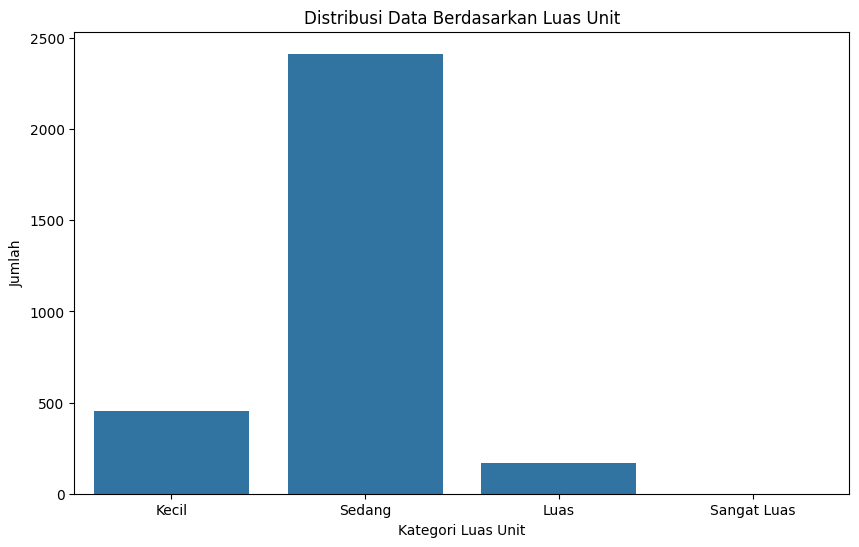

In [279]:
bins_unit_area = [0, 50, 100, 150, float('inf')]
labels_unit_area = ['Kecil', 'Sedang', 'Luas', 'Sangat Luas']

unit_area_group = pd.cut(dataku['unit_area'], bins=bins_unit_area, labels=labels_unit_area, right=False)

plt.figure(figsize=(10, 6))
sns.countplot(x=unit_area_group, order=labels_unit_area)
plt.title('Distribusi Data Berdasarkan Luas Unit')
plt.xlabel('Kategori Luas Unit')
plt.ylabel('Jumlah')
plt.show()

Dari hasil visualisasi distribusi data berdasarkan luas unit properti dapat disimpulkan bahwa kebanyakan unit memiliki luas dengan kategori sedang yaitu 50-100 m.

### Pengelompokkan Data berdasarkan **Harga Sewa Bulanan**

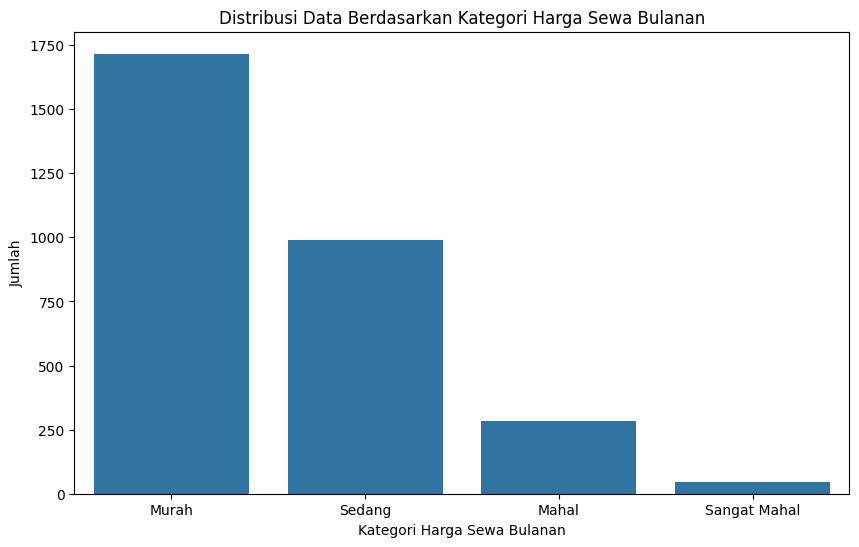

In [280]:
dataku[['deposit', 'monthly_rent']] = scaler.inverse_transform(dataku[['deposit', 'monthly_rent']])

bins_rent = [0, 1000000, 2000000, 3000000, float('inf')] 
labels_rent = ['Murah', 'Sedang', 'Mahal', 'Sangat Mahal']
rent_category = pd.cut(dataku['monthly_rent'], bins=bins_rent, labels=labels_rent, right=False)

# Visualisasi Distribusi Data Berdasarkan Kategori Harga Sewa Bulanan
plt.figure(figsize=(10, 6))
sns.countplot(x=rent_category, order=labels_rent)
plt.title('Distribusi Data Berdasarkan Kategori Harga Sewa Bulanan')
plt.xlabel('Kategori Harga Sewa Bulanan')
plt.ylabel('Jumlah')
plt.show()

Dari visualisasi distiribusi data berdasarkan kategori harga sewa bulanan tersebut, dapat disimpulkan bahwa properti dengan harga sewa bulanan murah yaitu 0-1000000 memiliki jumlah data terbanyak.

In [281]:
# normalisasi data deposit dan monthly_rent lagi
dataku[['deposit', 'monthly_rent']] = scaler.fit_transform(dataku[['deposit', 'monthly_rent']])

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

### **1. Pemilihan Algoritma Clustering**
Disini saya menggunakan Algoritma K-Prototypes yang cocok untuk data dengan campuran fitur numerikal dan kategorikal. Algoritma ini merupakan kombinasi antara K-Means (untuk fitur numerik) dan K-Modes (untuk fitur kategorikal).

### **2. Melatih Model**

In [282]:
numerical_cols = ['deposit', 'monthly_rent', 'unit_area', 'property_age']
categorical_cols = ['has_elevator', 'has_storage_area']

kproto = KPrototypes(n_clusters=4, init='Cao', verbose=2)
clusters = kproto.fit_predict(dataku[numerical_cols + categorical_cols], categorical=[4, 5])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 525, ncost: 290984.5487224527
Run: 1, iteration: 2/100, moves: 319, ncost: 245256.6812623563
Run: 1, iteration: 3/100, moves: 147, ncost: 239197.57460697484
Run: 1, iteration: 4/100, moves: 37, ncost: 238700.6632871221
Run: 1, iteration: 5/100, moves: 0, ncost: 238700.6632871221
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 305, ncost: 283160.5805372259
Run: 2, iteration: 2/100, moves: 385, ncost: 267782.30519288284
Run: 2, iteration: 3/100, moves: 256, ncost: 261251.87763843685
Run: 2, iteration: 4/100, moves: 264, ncost: 254784.59515718062
Run: 2, iteration: 5/100, moves: 169, ncost: 251488.33782507936
Run: 2, iteration: 6/100, moves: 178, ncost: 244467.38099444305
Run: 2, iteration: 7/100, moves: 108, ncost: 242198.6256960708
Run: 

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

### **1. Mencari Jumlah Cluster paling Optimal dengan Elbow Method**

Clustering untuk k = 1
Clustering untuk k = 2
Clustering untuk k = 3
Clustering untuk k = 4
Clustering untuk k = 5
Clustering untuk k = 6
Clustering untuk k = 7
Clustering untuk k = 8
Clustering untuk k = 9
Clustering untuk k = 10


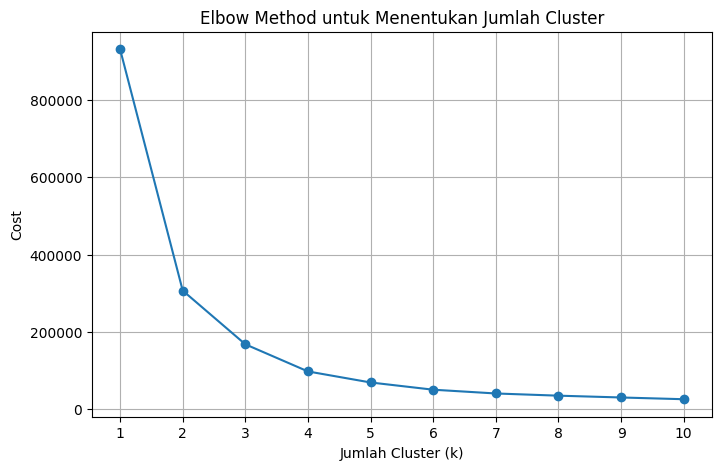

In [283]:
K_range = range(1, 11)  # Coba dari 1 sampai 10 cluster
cost = []

for k in K_range:
    print(f"Clustering untuk k = {k}")
    kproto = KPrototypes(n_clusters=k, init='Cao', verbose=0, random_state=42)
    kproto.fit_predict(dataku[numerical_cols + categorical_cols], categorical=[3, 4])
    cost.append(kproto.cost_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, cost, marker='o')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Cost')
plt.xticks(K_range)
plt.grid(True)
plt.show()

Dlihat dari grafik hasil Elbow, jumlah cluster paling optimal adalah 4 cluster.

### **2. Menghitung Silhoutte Score**

In [284]:
score = silhouette_score(dataku[numerical_cols + categorical_cols], clusters, metric='euclidean')
print(f"Silhouette Score: {score}")

Silhouette Score: 0.3632172462907538


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

### **1. Menerapkan Feature Selection dengan metode Variance Threshold**

In [285]:
selector = VarianceThreshold(threshold=0.1)
X_selected = selector.fit_transform(dataku[numerical_cols + categorical_cols])

print("Fitur yang dipilih:")
print(dataku[numerical_cols + categorical_cols].columns[selector.get_support()])
print("Data setelah feature selection:")
print(X_selected)

Fitur yang dipilih:
Index(['unit_area', 'property_age', 'has_elevator', 'has_storage_area'], dtype='object')
Data setelah feature selection:
[[60.  6.  1.  0.]
 [45.  4.  1.  1.]
 [86.  5.  1.  0.]
 ...
 [98.  7.  1.  1.]
 [63.  9.  0.  1.]
 [63. 15.  0.  0.]]


### **2. Evaluasi Model menggunakan Hasil Feature Selection**

Clustering untuk k = 1
Clustering untuk k = 2
Clustering untuk k = 3
Clustering untuk k = 4
Clustering untuk k = 5
Clustering untuk k = 6
Clustering untuk k = 7
Clustering untuk k = 8
Clustering untuk k = 9
Clustering untuk k = 10


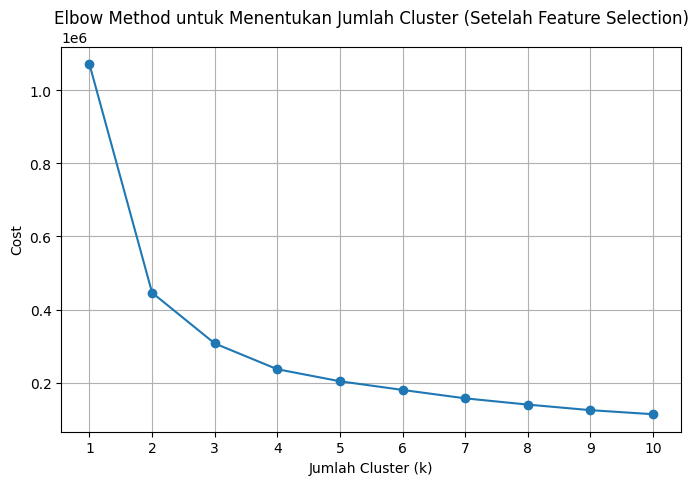

In [286]:
cost_selected = []

for k in K_range:
    print(f"Clustering untuk k = {k}")
    kproto_selected = KPrototypes(n_clusters=k, init='Cao', verbose=0, random_state=42)
    kproto_selected.fit_predict(X_selected, categorical=[2, 3])
    cost_selected.append(kproto_selected.cost_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, cost_selected, marker='o')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster (Setelah Feature Selection)')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Cost')
plt.xticks(K_range)
plt.grid(True)
plt.show()

In [287]:
kproto_selected = KPrototypes(n_clusters=4, init='Cao', verbose=2)
clusters_selected = kproto_selected.fit_predict(X_selected, categorical=[2, 3])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 578, ncost: 274151.0056682294
Run: 1, iteration: 2/100, moves: 116, ncost: 272437.55902365554
Run: 1, iteration: 3/100, moves: 32, ncost: 272233.93525294616
Run: 1, iteration: 4/100, moves: 51, ncost: 271779.35814610805
Run: 1, iteration: 5/100, moves: 83, ncost: 270910.7793416386
Run: 1, iteration: 6/100, moves: 91, ncost: 270058.1973871179
Run: 1, iteration: 7/100, moves: 62, ncost: 269568.26059296454
Run: 1, iteration: 8/100, moves: 45, ncost: 269233.6499228212
Run: 1, iteration: 9/100, moves: 55, ncost: 268921.66915669094
Run: 1, iteration: 10/100, moves: 24, ncost: 268855.28013175254
Run: 1, iteration: 11/100, moves: 72, ncost: 267980.2829212201
Run: 1, iteration: 12/100, moves: 122, ncost: 265357.2418617907
Run: 1, iteration: 13/100, moves: 265, ncost: 254795.58562056435
Run: 1, iteration: 14/1

### **3. Menghitung Silhouette Score hasil Feature Selection**

In [288]:
score_selected = silhouette_score(X_selected, clusters_selected, metric='euclidean')
print(f"Silhouette Score after Variance Thresholding: {score_selected}")

Silhouette Score after Variance Thresholding: 0.36376297803936597


Dari hasil Silhoutte Score sebelum dan sesudah menerapkan Feature Selection, hanya ada penambahan yang sangat sedikit yang terjadi pada Silhoutte Score

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

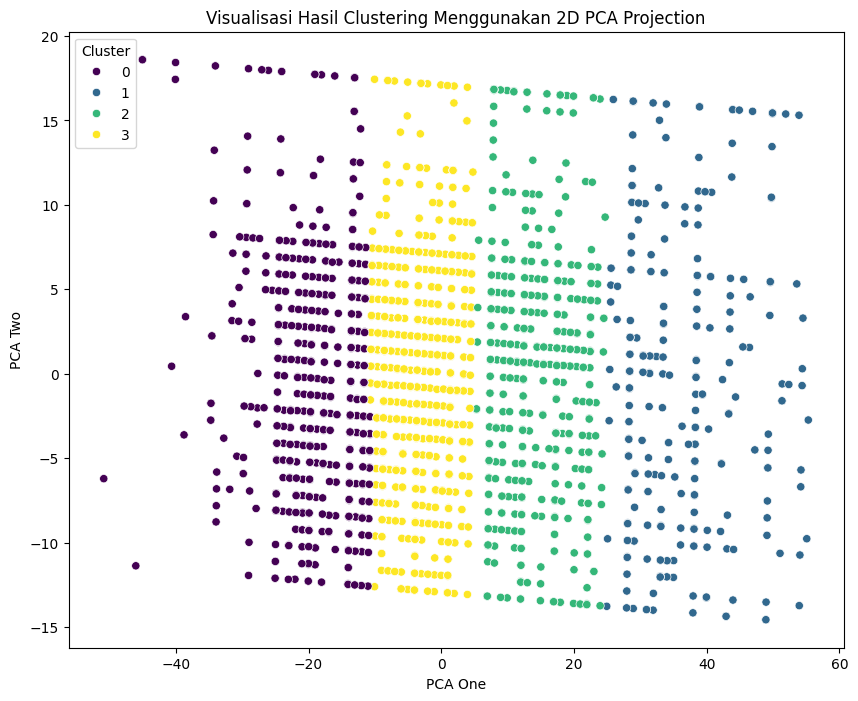

In [289]:
# Mengurangi dimensi data menjadi 2D menggunakan PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(dataku[numerical_cols + categorical_cols])

# Visualisasi hasil clustering
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=clusters_selected, palette='viridis')
plt.title('Visualisasi Hasil Clustering Menggunakan 2D PCA Projection')
plt.xlabel('PCA One')
plt.ylabel('PCA Two')
plt.legend(title='Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [290]:
# Tambahkan hasil label cluster ke DataFrame yang telah dinormalisasi
dataku['Cluster'] = clusters_selected

# Lakukan inverse transform pada fitur yang sudah dilabelisasi dan distandarisasi
dataku[['has_elevator', 'has_storage_area']] = dataku[['has_elevator', 'has_storage_area']].apply(label_encoder.inverse_transform)

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [291]:
# Inverse transform untuk fitur yang distandarisasi
dataku[['deposit', 'monthly_rent']] = scaler.inverse_transform(dataku[['deposit', 'monthly_rent']])

# Masukkan data yang sudah di-inverse ke dalam dataset asli atau buat DataFrame baru
df['Cluster'] = dataku['Cluster']
df[['has_elevator', 'has_storage_area']] = dataku[['has_elevator', 'has_storage_area']]
df[['deposit', 'monthly_rent']] = dataku[['deposit', 'monthly_rent']]

df.head()

,item_id,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age,Cluster
0,91c0e569-bddd-4128-9720-2550bb85580e,NaN,NaN,263682f6-d0cd-4569-aeec-e727b76b7665,1.0,42,NaN,3.0,0.0,NaN,23.0,NaN
1,b00b7919-06be-4d26-98b8-1971787e1d46,NaN,NaN,97c9535e-3985-47ce-a84c-a962c838a76b,2.0,116,NaN,NaN,1.0,NaN,16.0,NaN
2,9eddb6bc-e424-4774-b55f-bfd54366d627,NaN,NaN,b790f536-c274-4147-86e0-94d9b6d7352d,1.0,74,NaN,2.0,0.0,NaN,19.0,NaN
3,12cf6b07-5d56-4126-94d2-ce9cbfe2214f,36000000.0,864000.0,93d06676-4975-4cc5-919b-3a0c29c7ad43,1.0,60,True,NaN,2.0,False,6.0,3.0
4,929eb20c-3694-46b2-b96c-91117b995d1b,28800000.0,1296000.0,58e59fa9-9947-478f-9cef-bc6a2cbe49a9,1.0,45,True,NaN,1.0,True,4.0,0.0


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
# Melihat ringkasan statistik tiap cluster
cluster_summary = df.groupby('Cluster').agg({
    'unit_area': 'mean',
    'property_age': 'mean',
    'has_elevator': lambda x: x.value_counts().index[0],
    'has_storage_area': lambda x: x.value_counts().index[0],
    'Cluster': 'count'
}).rename(columns={'Cluster': 'Jumlah Properti'})

cluster_summary

,unit_area,property_age,has_elevator,has_storage_area,Jumlah Properti
Cluster,,,,,
0.0,48.639130,11.966304,False,True,920
1.0,102.485149,13.775578,False,True,303
2.0,80.290780,13.609929,False,True,705
3.0,63.054103,13.017133,False,True,1109


Tulis hasil interpretasinya di sini.
1. Cluster 0:
    - Jumlah Properti: 920
    - Luas Unit (Rata-rata): 48.6 m² → paling kecil
    - Usia Properti: ~12 tahun → relatif baru
    - Fasilitas:
        - Tidak ada elevator
        - Ada ruang penyimpanan
    - Analisis: Cluster ini kemungkinan berisi unit kecil tanpa lift yang cocok untuk penghuni tunggal, mahasiswa, atau pasangan muda. Fasilitas minim, tapi masih ada ruang penyimpanan, dan bangunannya masih relatif baru.
2. Cluster 1:
    - Jumlah Properti: 303 (paling sedikit)
    - Luas Unit (Rata-rata): 102.5 m² → paling luas
    - Usia Properti: ~13.8 tahun
    - Fasilitas:
        - Tidak ada elevator
        - Ada ruang penyimpanan

    - Analisis: Properti dalam cluster ini sangat luas, namun tidak ada elevator — kemungkinan properti ini berupa rumah tapak (landed house) atau bangunan rendah. Cocok untuk keluarga besar atau pengguna yang butuh ruang luas, meskipun dari sisi fasilitas vertikal tidak memadai.
3. Cluster 2:
    - Jumlah Properti: 705
    - Luas Unit (Rata-rata): 80.3 m²
    - Usia Properti: ~13.6 tahun
    - Fasilitas:
        - Tidak ada elevator
        - Ada ruang penyimpanan
    - Analisis: Cluster ini menampilkan unit sedang, usia properti menengah, dan tanpa elevator. Cocok untuk keluarga kecil atau pekerja yang membutuhkan kenyamanan tanpa fasilitas premium.
4. CLuster 3:
    - Jumlah Properti: 1109 (paling banyak)
    - Luas Unit (Rata-rata): 63.0 m²
    - Usia Properti: ~13.0 tahun
    - Fasilitas:
        - Tidak ada elevator
        - Ada ruang penyimpanan
    - Analisis: Cluster ini merupakan kategori properti menengah-rendah dengan ukuran sedang dan tanpa elevator. Jumlah propertinya paling banyak → bisa diasumsikan ini tipe properti yang paling umum atau standar di daerah tersebut.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
df.to_csv('Dataset_clustering.csv', index=False)